In [172]:
# Both Semiconductor & Traditional Tech companies will be in this file
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pathlib import Path
import nltk

In [173]:
# Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["News_API"])

# Set Alpaca API key and secret

alpaca_api_key = os.getenv("API_Key_ID")
alpaca_secret_key = os.getenv("Alpaca_Secret_Key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [174]:
load_dotenv()

True

In [175]:
# Set the tickers for the Semiconductor stocks
amd_ticker = ["AMD"]
nvda_ticker = ["NVDA"]
# Set timeframe to '1D'
timeframe = "1D"

# Set date and the date for 2008
start_date = pd.Timestamp("2008-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2008-12-31", tz="America/New_York").isoformat()

# Get the entire year of 2008 worth of historical data for the stocks
amd_df = api.get_barset(
    amd_ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

nvda_df = api.get_barset(
    nvda_ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
# Display data
amd_df.head()

AMD                            
                           open  high   low close    volume
time                                                       
2008-08-11 00:00:00-04:00  5.10  5.20  5.03  5.10  15357358
2008-08-12 00:00:00-04:00  5.20  5.35  5.12  5.21  29786686
2008-08-13 00:00:00-04:00  5.20  5.23  5.00  5.15  18525188
2008-08-14 00:00:00-04:00  5.15  5.37  5.14  5.31  18530013
2008-08-15 00:00:00-04:00  5.37  5.87  5.25  5.62  32811844

In [184]:
# Drop Outer Table Level
#amd_df = amd_df.droplevel(axis=1, level=0)
#amd_df['AMD'] = amd_df['close']
# amd_df = amd_df.drop(columns = 'close')

# Use the drop function to drop extra columns
#amd_df = amd_df.drop(columns=["open", "high", "low", "volume"])

# Since this is daily data, we can keep only the date (remove the time) component of the data
#amd_df.index = amd_df.index.time

# Display sample data
#amd_df['AMD'] = amd_df['close']
#amd_df = amd_df.drop(columns = 'close')
amd_df.head()

,AMD
00:00:00,5.10
00:00:00,5.21
00:00:00,5.15
00:00:00,5.31
00:00:00,5.62


In [170]:
nvda_df.head()

NVDA                                 
                            open   high    low    close    volume
time                                                             
2008-08-11 00:00:00-04:00  11.11  11.50  11.04  11.2400  29123383
2008-08-12 00:00:00-04:00  11.32  11.35  10.91  11.0501  32041111
2008-08-13 00:00:00-04:00  11.92  12.44  11.66  12.2800  49645921
2008-08-14 00:00:00-04:00  12.20  13.49  12.17  12.9900  38673831
2008-08-15 00:00:00-04:00  13.26  13.38  12.87  12.9500  17538662

In [186]:
nvda_df['NVDA'] = nvda_df['close']
nvda_df = nvda_df.drop(columns = 'close')
nvda_df.head()

KeyError: 'close'

In [130]:
# Combine DataFrames
semiconductor_df = pd.concat([amd_df, nvda_df], axis="columns", join="inner")
semiconductor_df.head()

,date,text,positive,neutral,negative,compound,date,text,positive,neutral,negative,compound
0,2021-07-16,Semiconductor heavyweight \r\n Intel\r\n is in...,0.000,1.000,0.000,0.0000,2021-07-16,Intel Corp. INTC -1.26% is exploring a deal to...,0.037,0.963,0.000,0.0258
1,2021-07-09,"When it comes to technical analysis, Im an ama...",0.072,0.782,0.146,-0.3672,2021-07-09,"When it comes to technical analysis, Im an ama...",0.072,0.782,0.146,-0.3672
2,2021-07-16,Intel Corp. INTC -1.26% is exploring a deal to...,0.037,0.963,0.000,0.0258,2021-07-13,You might be alarmed when you see headlines ab...,0.136,0.821,0.044,0.5574
3,2021-07-16,Semiconductor heavyweight \r\n Intel\r\n is in...,0.000,1.000,0.000,0.0000,2021-07-08,Getty Images\r\nGetty Images\r\nKey Takeaways:...,0.000,0.906,0.094,-0.4019


In [37]:
semiconductor_returns = semiconductor_df.pct_change().dropna()
semiconductor_df = semiconductor_df.append(semiconductor_returns)
semiconductor_returns.head()

,AMD,NVDA
2008-08-12,0.021569,-0.016895
2008-08-13,-0.011516,0.111302
2008-08-14,0.031068,0.057818
2008-08-15,0.058380,-0.003079
2008-08-18,0.049822,0.023166


In [42]:
semiconductor_df['AMD % Returns'] = semiconductor_returns['AMD']
semiconductor_df['NVDA % Returns'] = semiconductor_returns['NVDA']

In [185]:
semiconductor_df.head()

,date,text,positive,neutral,negative,compound,date,text,positive,neutral,negative,compound
0,2021-07-16,Semiconductor heavyweight \r\n Intel\r\n is in...,0.000,1.000,0.000,0.0000,2021-07-16,Intel Corp. INTC -1.26% is exploring a deal to...,0.037,0.963,0.000,0.0258
1,2021-07-09,"When it comes to technical analysis, Im an ama...",0.072,0.782,0.146,-0.3672,2021-07-09,"When it comes to technical analysis, Im an ama...",0.072,0.782,0.146,-0.3672
2,2021-07-16,Intel Corp. INTC -1.26% is exploring a deal to...,0.037,0.963,0.000,0.0258,2021-07-13,You might be alarmed when you see headlines ab...,0.136,0.821,0.044,0.5574
3,2021-07-16,Semiconductor heavyweight \r\n Intel\r\n is in...,0.000,1.000,0.000,0.0000,2021-07-08,Getty Images\r\nGetty Images\r\nKey Takeaways:...,0.000,0.906,0.094,-0.4019


In [46]:
# Fetch news about AMD in 2008
amd_News = newsapi.get_everything(
    q=" AMD AND Advanced Micro Devices AND 2008",
    language="en"
    #to= 2008-12-31
)

# Show the total number of news
amd_News["totalResults"]

21

In [48]:
# Fetch news about AMD in 2008
nvda_News = newsapi.get_everything(
    q=" NVDA AND NVIDIA AND 2008",
    language="en"
    #to= 2008-12-31
)

# Show the total number of news
nvda_News["totalResults"]

4

In [63]:
amd_sentiment = []
analyzer = SentimentIntensityAnalyzer()

for article in amd_News["articles"]:
    try:
        date = article["publishedAt"][:10] # Measure for the date
        text = article["content"][0:198]
        sentiment = analyzer.polarity_scores(text) # Getting polarity scores so we can build our sentiment from the analyzer
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        compound = sentiment["compound"] # Compound sentiment
        
        amd_sentiment.append({
            "text": text,
            "date": date,
            "positive": pos,
            "neutral": neu,
            "negative": neg,
            "compound": compound # Compound sentiment
        })
        
    except AttributeError:
        pass

amd_df = pd.DataFrame(amd_sentiment) 
semiconductor_df = pd.DataFrame(amd_sentiment) 
cols = ['date', 'text', 'positive', 'neutral', 'negative', 'compound']
amd_df = amd_df[cols] # Set the reorganized columns for the dataframe
amd_df.describe()

,positive,neutral,negative,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.026000,0.926100,0.047950,-0.044090
std,0.038471,0.085267,0.080186,0.305732
min,0.000000,0.750000,0.000000,-0.612400
25%,0.000000,0.900750,0.000000,-0.231750
50%,0.000000,0.954500,0.000000,0.000000
75%,0.041750,1.000000,0.065750,0.025800
max,0.136000,1.000000,0.250000,0.557400


In [64]:
nvda_sentiment = []

for article in nvda_News["articles"]:
    try:
        date = article["publishedAt"][:10] # Measure for the date
        text = article["content"][0:198]
        sentiment = analyzer.polarity_scores(text) # Getting polarity scores so we can build our sentiment from the analyzer
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        compound = sentiment["compound"] # Compound sentiment
        
        nvda_sentiment.append({
            "text": text,
            "date": date,
            "positive": pos,
            "neutral": neu,
            "negative": neg,
            "compound": compound # Compound sentiment
        })
        
    except AttributeError:
        pass

nvda_df = pd.DataFrame(nvda_sentiment) 
sentiment_df = pd.DataFrame(nvda_sentiment)
cols = ['date', 'text', 'positive', 'neutral', 'negative', 'compound']
nvda_df = nvda_df[cols] # Set the reorganized columns for the dataframe
nvda_df.describe()

,positive,neutral,negative,compound
count,4.000000,4.000000,4.000000,4.000000
mean,0.061250,0.868000,0.071000,-0.046475
std,0.057858,0.081801,0.063045,0.446871
min,0.000000,0.782000,0.000000,-0.401900
25%,0.027750,0.811250,0.033000,-0.375875
50%,0.054500,0.863500,0.069000,-0.170700
75%,0.088000,0.920250,0.107000,0.158700
max,0.136000,0.963000,0.146000,0.557400


In [58]:
nvda_df.head()

,date,text,positive,neutral,negative,compound
0,2021-07-16,Intel Corp. INTC -1.26% is exploring a deal to...,0.037,0.963,0.000,0.0258
1,2021-07-09,"When it comes to technical analysis, Im an ama...",0.072,0.782,0.146,-0.3672
2,2021-07-13,You might be alarmed when you see headlines ab...,0.136,0.821,0.044,0.5574
3,2021-07-08,Getty Images\r\nGetty Images\r\nKey Takeaways:...,0.000,0.906,0.094,-0.4019


In [59]:
amd_df.head()

,date,text,positive,neutral,negative,compound
0,2021-07-16,Semiconductor heavyweight \r\n Intel\r\n is in...,0.000,1.000,0.000,0.0000
1,2021-07-09,"When it comes to technical analysis, Im an ama...",0.072,0.782,0.146,-0.3672
2,2021-07-16,Intel Corp. INTC -1.26% is exploring a deal to...,0.037,0.963,0.000,0.0258
3,2021-07-16,Semiconductor heavyweight \r\n Intel\r\n is in...,0.000,1.000,0.000,0.0000
4,2021-07-08,Yves here. Get a cup of coffee. This is an ext...,0.072,0.928,0.000,0.3384


In [114]:
# Semiconductor_df file
chip_path = Path(r'C:\Users\Yonathan\Desktop\semiconductor.csv', index=False)
semiconductor_df.to_csv(chip_path)

# amd_df file
amd_path = Path(r'C:\Users\Yonathan\Desktop\amd.csv', index=False)
amd_df.to_csv(amd_path)

# nvda_df file
nvda_path = Path(r'C:\Users\Yonathan\Desktop\nvda.csv', index=False)
nvda_df.to_csv(nvda_path)

In [85]:
#semiconductor_df.index = semiconductor_df.index.date ?
semiconductor_df.head()

,text,date,positive,neutral,negative,compound
0,Semiconductor heavyweight \r\n Intel\r\n is in...,2021-07-16,0.000,1.000,0.000,0.0000
1,"When it comes to technical analysis, Im an ama...",2021-07-09,0.072,0.782,0.146,-0.3672
2,Intel Corp. INTC -1.26% is exploring a deal to...,2021-07-16,0.037,0.963,0.000,0.0258
3,Semiconductor heavyweight \r\n Intel\r\n is in...,2021-07-16,0.000,1.000,0.000,0.0000
4,Yves here. Get a cup of coffee. This is an ext...,2021-07-08,0.072,0.928,0.000,0.3384


In [66]:
# Tech stocks

In [189]:
# Set the tickers for the Semiconductor stocks
aapl_ticker = ["AAPL"]
msft_ticker = ["MSFT"]
# Set timeframe to '1D'
timeframe = "1D"

# Set date and the date for 2008
start_date = pd.Timestamp("2008-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2008-12-31", tz="America/New_York").isoformat()

# Get the entire year of 2008 worth of historical data for the stocks
aapl_df = api.get_barset(
    aapl_ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

msft_df = api.get_barset(
    msft_ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
# Display data
aapl_df.head()

AAPL                                   
                             open    high     low   close     volume
time                                                                
2008-08-11 00:00:00-04:00  24.303  25.214  24.239  24.793  217147576
2008-08-12 00:00:00-04:00  24.794  25.613  24.787  25.269  202305395
2008-08-13 00:00:00-04:00  25.416  25.714  25.129  25.617  204471048
2008-08-14 00:00:00-04:00  25.473  25.779  25.406  25.609  166907819
2008-08-15 00:00:00-04:00  25.567  25.679  25.007  25.100  155869244

In [96]:
msft_df.head()

MSFT                               
                            open   high    low  close    volume
time                                                           
2008-08-11 00:00:00-04:00  27.87  28.40  27.66  27.90  63751320
2008-08-12 00:00:00-04:00  27.76  28.36  27.58  28.14  58188143
2008-08-13 00:00:00-04:00  28.07  28.50  27.76  27.91  46635919
2008-08-14 00:00:00-04:00  27.79  28.28  27.56  27.92  43124440
2008-08-15 00:00:00-04:00  27.92  28.15  27.58  27.80  43548108

In [190]:
# Drop Outer Table Level
aapl_df = aapl_df.droplevel(axis=1, level=0)
#msft_df = msft_df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
aapl_df = aapl_df.drop(columns=["open", "high", "low", "volume"])
#msft_df = msft_df.drop(columns=["open", "high", "low", "volume"])

# Since this is daily data, we can keep only the date (remove the time) component of the data
aapl_df.index = aapl_df.index.date
#msft_df.index = msft_df.index.date
# Display sample data
aapl_df.head()

,close
2008-08-11,24.793
2008-08-12,25.269
2008-08-13,25.617
2008-08-14,25.609
2008-08-15,25.100


In [206]:
#aapl_df['AAPL'] = aapl_df['close']
#aapl_df = aapl_df.drop(columns = 'close')
aapl_df['AAPL'] = aapl_df.AAPL.astype(str)
aapl_df.head()

,AAPL
2008-08-11,24.793
2008-08-12,25.269
2008-08-13,25.617
2008-08-14,25.609
2008-08-15,25.1


In [243]:
# Use AAPL for my 1st LSTM draft & MSFT for my 2nd LSTM draft
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# GET NEW SOURCE OF PRICES FROM YAHOO FINANCE

# Steps
# Get closing price into X
# Get sentiment from articles/reports into X
# Get y target data to be future prices
# Train(.7 weight) & Test(.3 weight) for the data
# Scale the data (using MinMaxScaler)
# Go from here

In [258]:
import yfinance as yf
amd = yf.Ticker("AMD")
amd_hist = amd.history(period="max")

amd.info # Stored in a dictionary with all kinds of info on the company

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 12600,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides x86 microprocessors for desktop PCs under the AMD Ryzen, AMD Ryzen PRO, Ryzen, Threadripper, AMD A-Series, AMD FX, AMD Athlon, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors for notebook and 2-in-1s under the AMD Ryzen, AMD A-Series, AMD Athlon, AMD Ryzen PRO, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors f

In [248]:
amd_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.000000,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.000000,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,0,0.0
...,...,...,...,...,...,...,...
2021-07-26,92.010002,92.750000,91.120003,91.820000,27531300,0,0.0
2021-07-27,92.940002,94.099998,89.099998,91.029999,68927000,0,0.0
2021-07-28,93.440002,98.709999,89.650002,97.930000,140396200,0,0.0


In [255]:
amd_hist.Close.to_frame()

,Close
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667
...,...
2021-07-26,91.820000
2021-07-27,91.029999
2021-07-28,97.930000


In [261]:
amd.quarterly_financials

,2021-06-26,2021-03-27,2020-12-26,2020-09-26
Research Development,659000000.0,610000000.0,573000000.0,508000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,823000000.0,644000000.0,549000000.0,402000000.0
Minority Interest,None,None,None,None
Net Income,710000000.0,555000000.0,1781000000.0,390000000.0
Selling General Administrative,341000000.0,304000000.0,308000000.0,273000000.0
Gross Profit,1830000000.0,1587000000.0,1451000000.0,1230000000.0
Ebit,831000000.0,677000000.0,570000000.0,449000000.0
Operating Income,831000000.0,677000000.0,570000000.0,449000000.0
Other Operating Expenses,-1000000.0,-4000000.0,-4000000.0,-4000000.0


In [262]:
amd.sustainability # Doesn't return anything
amd.cashflow

,2020-12-26,2019-12-28,2018-12-29,2017-12-30
Investments,-6.580000e+08,41000000.0,-78000000.0,-78000000.0
Change To Liabilities,-5.130000e+08,153000000.0,212000000.0,-8000000.0
Total Cashflows From Investing Activities,-9.520000e+08,-149000000.0,-170000000.0,-54000000.0
Total Cash From Financing Activities,6.000000e+06,43000000.0,28000000.0,-33000000.0
Change To Operating Activities,2.180000e+08,65000000.0,18000000.0,-130000000.0
Issuance Of Stock,8.500000e+07,523000000.0,70000000.0,20000000.0
Net Income,2.490000e+09,341000000.0,337000000.0,-33000000.0
Change In Cash,1.250000e+08,387000000.0,-108000000.0,-75000000.0
Repurchase Of Stock,-7.800000e+07,-6000000.0,-6000000.0,-6000000.0
Total Cash From Operating Activities,1.071000e+09,493000000.0,34000000.0,12000000.0


In [265]:
amd.recommendations # Try to group it by year

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-07 09:24:00,Longbow Research,Hold,Buy,up
2012-03-15 06:18:00,Jefferies,Buy,,up
2012-04-17 07:15:00,Sterne Agee,Buy,,main
2012-04-20 06:17:00,Deutsche Bank,Hold,,main
2012-04-20 06:40:00,Citigroup,Buy,,main
...,...,...,...,...
2021-04-28 12:59:40,Mizuho,Buy,,main
2021-07-15 16:00:45,Citigroup,Neutral,Sell,up
2021-07-28 11:17:22,Rosenblatt,Buy,,main


In [266]:
amd.recommendations['To Grade'].value_counts()

Buy               68
Neutral           53
Outperform        33
Hold              21
Equal-Weight      14
Underperform      11
Market Perform    10
Underweight        8
Overweight         8
Sell               6
Positive           3
Sector Perform     1
Negative           1
                   1
Perform            1
Sector Weight      1
Name: To Grade, dtype: int64

In [267]:
amd.calendar

,0,1
Earnings Date,2021-10-25 00:00:00,2021-10-29 00:00:00
Earnings Average,0.54,0.54
Earnings Low,0.46,0.46
Earnings High,0.6,0.6
Revenue Average,3617850000,3617850000
Revenue Low,3500000000,3500000000
Revenue High,3828000000,3828000000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

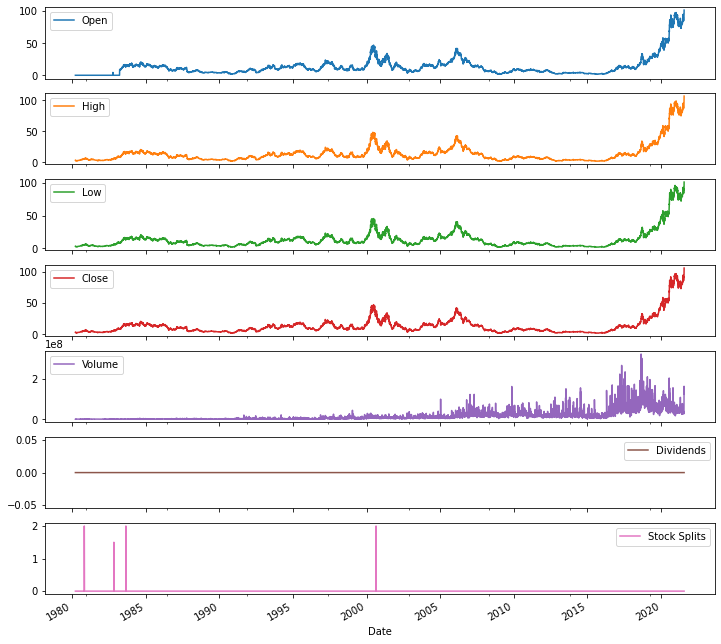

In [269]:
amd_hist.plot(kind='line', figsize=(12,12), subplots=True)

In [278]:
# Collecting Advanced FNAN Data 

In [237]:
# Need to figure out the features, which will be X, and the target, which will be y.
scaler = MinMaxScaler()
scaler.fit(X)
X_train, X_test = scaler.transform(X_train, X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)


(X_train, y_train), (X_test, y_test) = mnist.load_data() # Need to convert AAPL close prices to a string

NameError: name 'X' is not defined

In [238]:
X_train = X_train.astype("float64") / 255.0
X_test = X_test.astype("float64") / 255.0
#X.ndim

model = keras.Sequential()
model.add(keras.Input(shape=(3, 28, 28)))
model.add( # number before the return_sequences=True is for the amount of nodes & will have that many for each timestamp
   layers.LSTM(512, return_sequences=True, activation='tanh', recurrent_activation='sigmoid') # return_sequences=True is have the ability to stack multiple layers on one another
)
model.add(layers.LSTM(512, activation='tanh')) # No return_sequences here
model.add(layers.Dense(12))

# print(model.summary()) This is to check the Output Shape & Param #'s before compiling the model

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # To check the measure of the lack of predictability between two probability distributions over the same set of events.
    optimizer=keras.optimizers.SGD(lr=.005), 
    metrics=['accuracy']
)
model.fit(X_train, y_train, batch_size=3, epochs=10, verbose=2)
model.evaluate(X_test, y_test, batch_size=3, verbose=2)


ValueError: Input 0 of layer lstm_23 is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 3, 28, 28)

In [103]:
msft_df['MSFT'] = msft_df['close']
msft_df = msft_df.drop(columns = 'close')
msft_df.head()

,MSFT
2008-08-11,27.90
2008-08-12,28.14
2008-08-13,27.91
2008-08-14,27.92
2008-08-15,27.80


In [104]:
# Combine DataFrames
tech_df = pd.concat([aapl_df, msft_df], axis="columns", join="inner")
tech_df.tail()

,AAPL,MSFT
2008-12-24,12.157,19.16
2008-12-26,12.260,19.12
2008-12-29,12.371,18.97
2008-12-30,12.327,19.32
2008-12-31,12.191,19.44


In [105]:
tech_returns = tech_df.pct_change().dropna()
tech_df = tech_df.append(tech_returns)
tech_returns.head()

,AAPL,MSFT
2008-08-12,0.019199,0.008602
2008-08-13,0.013772,-0.008173
2008-08-14,-0.000312,0.000358
2008-08-15,-0.019876,-0.004298
2008-08-18,-0.001594,-0.003237


In [106]:
tech_df['MSFT % Returns'] = tech_returns['MSFT']
tech_df['AAPL % Returns'] = tech_returns['AAPL']

In [107]:
tech_df.head()

,AAPL,MSFT,MSFT % Returns,AAPL % Returns
2008-08-11,24.793,27.90,NaN,NaN
2008-08-12,25.269,28.14,0.008602,0.019199
2008-08-13,25.617,27.91,-0.008173,0.013772
2008-08-14,25.609,27.92,0.000358,-0.000312
2008-08-15,25.100,27.80,-0.004298,-0.019876


In [108]:
# Fetch news about AAPL in 2008
aapl_News = newsapi.get_everything(
    q=" AAPL AND AAPL AND 2008",
    language="en"
    #to= 2008-12-31
)

# Show the total number of news
aapl_News["totalResults"]

28

In [109]:
# Fetch news about AMD in 2008
msft_News = newsapi.get_everything(
    q=" MSFT AND Microsoft AND 2008",
    language="en"
    #to= 2008-12-31
)

# Show the total number of news
msft_News["totalResults"]

23

In [124]:
aapl_sentiment = []
analyzer = SentimentIntensityAnalyzer()

for article in aapl_News["articles"]:
    try:
        date = article["publishedAt"][:10] # Measure for the date
        text = article["content"][0:198]
        sentiment = analyzer.polarity_scores(text) # Getting polarity scores so we can build our sentiment from the analyzer
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        compound = sentiment["compound"] # Compound sentiment
        
        aapl_sentiment.append({
            "text": text,
            "date": date,
            "positive": pos,
            "neutral": neu,
            "negative": neg,
            "compound": compound # Compound sentiment
        })
        
    except AttributeError:
        pass

aapl_df = pd.DataFrame(aapl_sentiment) 
tech_df = pd.DataFrame(aapl_sentiment) 
cols = ['date', 'positive', 'neutral', 'negative', 'compound', 'text']
aapl_df = aapl_df[cols] # Set the reorganized columns for the dataframe
aapl_df.describe()

,positive,neutral,negative,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.065250,0.897150,0.037650,0.118210
std,0.085083,0.118522,0.080042,0.437554
min,0.000000,0.574000,0.000000,-0.942200
25%,0.000000,0.827000,0.000000,-0.006450
50%,0.020500,0.920000,0.000000,0.000000
75%,0.116750,1.000000,0.046750,0.394350
max,0.306000,1.000000,0.344000,0.904400


In [121]:
msft_sentiment = []
analyzer = SentimentIntensityAnalyzer()

for article in amd_News["articles"]:
    try:
        date = article["publishedAt"][:10] # Measure for the date
        sentiment = analyzer.polarity_scores(text) # Getting polarity scores so we can build our sentiment from the analyzer
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        compound = sentiment["compound"] # Compound sentiment
        text = article["content"][0:198]
        
        msft_sentiment.append({
            "date": date,
            "positive": pos,
            "neutral": neu,
            "negative": neg,
            "compound": compound, # Compound sentiment
            "text": text
        })
        
    except AttributeError:
        pass

msft_df = pd.DataFrame(msft_sentiment) 
msft_df = pd.DataFrame(msft_sentiment) 
cols = ['date', 'positive', 'neutral', 'negative', 'compound', 'text']
msft_df = msft_df[cols] # Set the reorganized columns for the dataframe
msft_df.describe()

,positive,neutral,negative,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.026000,0.926100,0.047950,-0.044090
std,0.038471,0.085267,0.080186,0.305732
min,0.000000,0.750000,0.000000,-0.612400
25%,0.000000,0.900750,0.000000,-0.231750
50%,0.000000,0.954500,0.000000,0.000000
75%,0.041750,1.000000,0.065750,0.025800
max,0.136000,1.000000,0.250000,0.557400


In [125]:
aapl_df.head()

,date,positive,neutral,negative,compound,text
0,2021-07-14,0.119,0.881,0.000,0.6369,Retirement can be the best time of our lifebut...
1,2021-07-14,0.000,1.000,0.000,0.0000,How long can the Federal Reserve hold off befo...
2,2021-06-24,0.000,1.000,0.000,0.0000,BOSTON--(BUSINESS WIRE)--According to new rese...
3,2021-07-14,0.000,0.967,0.033,-0.0258,Markets opened higher as investors awaited tes...
4,2021-06-28,0.200,0.800,0.000,0.7569,"In this article, we discuss the 10 most popula..."


In [188]:
msft_df.head()

,date,positive,neutral,negative,compound,text
0,2021-07-16,0.000,0.750,0.250,-0.6124,Semiconductor heavyweight \r\n Intel\r\n is in...
1,2021-07-09,0.000,1.000,0.000,0.0000,"When it comes to technical analysis, Im an ama..."
2,2021-07-16,0.072,0.782,0.146,-0.3672,Intel Corp. INTC -1.26% is exploring a deal to...
3,2021-07-16,0.037,0.963,0.000,0.0258,Semiconductor heavyweight \r\n Intel\r\n is in...
4,2021-07-08,0.000,1.000,0.000,0.0000,Yves here. Get a cup of coffee. This is an ext...


In [187]:
tech_df.head()

,text,date,positive,neutral,negative,compound
0,Retirement can be the best time of our lifebut...,2021-07-14,0.119,0.881,0.000,0.6369
1,How long can the Federal Reserve hold off befo...,2021-07-14,0.000,1.000,0.000,0.0000
2,BOSTON--(BUSINESS WIRE)--According to new rese...,2021-06-24,0.000,1.000,0.000,0.0000
3,Markets opened higher as investors awaited tes...,2021-07-14,0.000,0.967,0.033,-0.0258
4,"In this article, we discuss the 10 most popula...",2021-06-28,0.200,0.800,0.000,0.7569


In [136]:
# Semiconductor_df file
tech_path = Path(r'C:\Users\Yonathan\Desktop\tech.csv', index=False)
tech_df.to_csv(tech_path)

# aapl_df file
aapl_path = Path(r'C:\Users\Yonathan\Desktop\aapl.csv', index=False)
aapl_df.to_csv(aapl_path)

# msft_df file
msft_path = Path(r'C:\Users\Yonathan\Desktop\msft.csv', index=False)
msft_df.to_csv(msft_path)